In [1]:
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.analyses import Correlations
from auditory_cortex.models import Regression
from auditory_cortex.neural_data.neural_meta_data import NeuralMetaData
from auditory_cortex.dataloader import DataLoader

import os
import torch
import numpy as np
import seaborn as sns

import scipy
import jiwer

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline

2024-04-02 12:47:17.068533: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-02 12:47:19.082886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /apps/gilbreth/cuda-toolkit/cuda-11.2.0/extras/CUPTI/lib64:/apps/gilbreth/cuda-toolkit/cuda-11.2.0/lib64:/apps/spack/gilbreth/apps/intel-mpi/2017.1.132-intel-17.0.1-p7yx74h/compilers_and_libraries_2017.1.132/linux/mpi/intel64/lib:/apps/spack/gilbreth/apps/intel-mpi/2017.1.132-intel-17.0.1-p7yx74h/compilers_and_libraries_2017.1.132/linux/mpi/mic/lib:/apps/spack/gilbreth/apps/intel-parallel-studio/cl

### WER: summary..

In [4]:
from auditory_cortex.io_utils.io import read_WER
df = read_WER()
df

Reading existing WER results


,librispeech-test-other,librispeech-test-clean,tedlium,common-voice
wave2vec2,9.473623,3.617562,14.071002,36.197635
whisper_tiny,19.627958,8.652706,7.807645,31.578366
speech2text,8.705467,3.410417,15.510715,36.581441
whisper_base,14.243841,5.967935,5.949023,22.355594
deepspeech2,30.093469,10.997534,35.588317,64.095265


In [5]:
model_name = 'wave2vec2'
benchmark = 'tedlium'
df.loc[model_name, benchmark]

14.07100200788848

#### WER vs peak median corr...

In [32]:
median_peaks = {
    'wave2letter_modified': 0.502,  # layer-ID: 8
    'wave2vec2': 0.595,             # layer-ID: 7
    'speech2text': 0.574,           # layer-ID: 7
    'whisper_tiny': 0.600,          # layer-ID: 2
    'whisper_base': 0.610,          # layer-ID: 2
    'deepspeech2': 0.55,            # layer-ID: 2   
}

def scatter_WER_v_corr(benchmark, ax=None):
    """Scatter plot WER on the benchmark specified vs peak median correlation."""
    if ax is None:
        fig, ax = plt.subplots()
    for model_name in PlotterUtils.model_names:
        if model_name == 'wave2letter_modified':
            continue
        wer = df.loc[model_name, benchmark]
        corr = median_peaks[model_name]
        color = PlotterUtils.get_model_specific_color(model_name)
        ax.scatter(wer, corr, color = color)
        ax.set_title(f"{benchmark}")
        ax.set_xlabel("WER (%)")
        ax.set_ylabel("$\\rho$")

Reading existing WER results


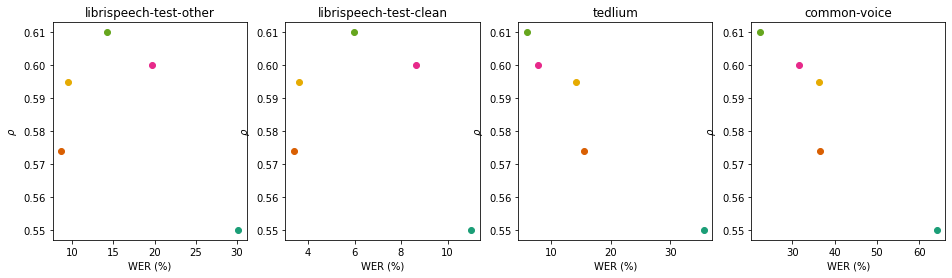

In [34]:
from auditory_cortex.io_utils.io import read_WER
df = read_WER()
fig, axes = plt.subplots(ncols=4, figsize=(16,4))
for i, benchmark in enumerate(df.columns):
    ax = axes[i]
    # benchmark = 'tedlium'
    scatter_WER_v_corr(benchmark=benchmark, ax=ax)


### TED-LIUM3

In [2]:

from auditory_cortex.analyses.evaluate_pretrained_performance import get_TEDLIUM_dataloader

batch_size = 64
libri_dataloader = get_TEDLIUM_dataloader(batch_size=batch_size)

### deepspeech2

In [2]:
auditory_dataloader = DataLoader()
model_name = 'deepspeech2'
dnn_obj = auditory_dataloader.get_DNN_obj(model_name)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (WordErrorRate). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/torchmetrics/utilities/prints.p

Model on device: cuda


In [3]:

from auditory_cortex.analyses.evaluate_pretrained_performance import get_TEDLIUM_dataloader

batch_size = 64
libri_dataloader = get_TEDLIUM_dataloader(batch_size=batch_size)

In [4]:
data = next(iter(libri_dataloader))

In [5]:
i = 0
audio = data[0][i]

from IPython.display import Audio
Audio(audio.cpu().numpy(), rate=16000)

In [6]:
data[1][i]

'ignore_time_segment_in_scoring\n'

In [7]:
i = 1
audio = data[0][i]

from IPython.display import Audio
Audio(audio.cpu().numpy(), rate=16000)

In [8]:
data[1][i]

"i 'd like to share with you a discovery that i made a few months ago while writing an article for italian wired i always keep my thesaurus handy whenever i 'm writing anything but   \n"

In [9]:
i = 2
audio = data[0][i]

from IPython.display import Audio
Audio(audio.cpu().numpy(), rate=16000)

In [11]:
i = 3
audio = data[0][i]

from IPython.display import Audio
Audio(audio.cpu().numpy(), rate=16000)

In [13]:
i = 5
audio = data[0][i]

from IPython.display import Audio
Audio(audio.cpu().numpy(), rate=16000)

In [20]:
data[1][3]

'ignore_time_segment_in_scoring\n'

In [24]:
test_str = 'ignore*time*segment*in*scoring'
if data[1][3].find(test_str):
    print("This is a test string...")

This is a test string...


In [10]:
data[1]

['ignore_time_segment_in_scoring\n',
 "i 'd like to share with you a discovery that i made a few months ago while writing an article for italian wired i always keep my thesaurus handy whenever i 'm writing anything but   \n",
 "i 'd already finished editing the piece and i realized that i had never once in my life looked up the word disabled to see what i 'd find let me read you the entry   \n",
 'ignore_time_segment_in_scoring\n',
 'disabled adjective crippled helpless useless wrecked   \n',
 'ignore_time_segment_in_scoring\n',
 'stalled maimed wounded mangled lame mutilated   \n',
 'rundown worn out weakened impotent castrated paralyzed handicapped   \n',
 'senile decrepit laid up done up done for done in cracked up counted out   \n',
 'ignore_time_segment_in_scoring\n',
 'see also hurt useless and weak antonyms healthy strong capable   \n',
 'ignore_time_segment_in_scoring\n',
 'i was reading this list out loud to a friend and at first was laughing it was so ludicrous but i just got

In [15]:
out = dnn_obj.batch_predictions(data[0])

In [33]:
ignore_test_str = 'ignore*time*segment*in*scoring'
for i, (ref, pred) in enumerate(zip(data[1], out)):
    if ref.find(ignore_test_str):
        data[1].pop(i)
        out.pop(i)
    

32

In [30]:
testt = [1,2,3,4]

In [31]:
testt.pop(1)

2

In [32]:
testt

[1, 3, 4]

In [29]:
len(data[1])

64

In [11]:
data[1]

['ignore_time_segment_in_scoring\n',
 "i 'd like to share with you a discovery that i made a few months ago while writing an article for italian wired i always keep my thesaurus handy whenever i 'm writing anything but   \n",
 "i 'd already finished editing the piece and i realized that i had never once in my life looked up the word disabled to see what i 'd find let me read you the entry   \n",
 'ignore_time_segment_in_scoring\n',
 'disabled adjective crippled helpless useless wrecked   \n',
 'ignore_time_segment_in_scoring\n',
 'stalled maimed wounded mangled lame mutilated   \n',
 'rundown worn out weakened impotent castrated paralyzed handicapped   \n',
 'senile decrepit laid up done up done for done in cracked up counted out   \n',
 'ignore_time_segment_in_scoring\n',
 'see also hurt useless and weak antonyms healthy strong capable   \n',
 'ignore_time_segment_in_scoring\n',
 'i was reading this list out loud to a friend and at first was laughing it was so ludicrous but i just got

In [25]:
labels_normalizer = auditory_dataloader.get_DNN_obj('whisper_tiny').get_labels_normalizer()

In [26]:
labels_normalizer(data[1][5])

'ignore time segment in scoring'

In [27]:
test_str = 'ignore*time*segment*in*scoring'
if labels_normalizer(data[1][5]).find(test_str):
    print("This is a test string...")

This is a test string...


In [9]:
out

[' e ee e  e e oee o  o  e oe e eee eee e a e ',
 "i'd like to share with youa discovery that i made a few months ago while writing an article for italian wired i always keep my fisara's handny bye r am writing anything but",
 'i had already finished editing a piece and i realized that i have never once an my life looked up the word disabled to see what id find let me readyou the entry',
 '',
 'disable adgtive crippled helpless useless rat',
 '',
 'stalled mamed wounded mangled lame mutilated',
 "run down worn out we can'd impotent castratid paralyzed handicapped",
 'cinaa decreppit lad up done up dune fora done in cracked uf counted out',
 '',
 'see also hurt useless and weak antonyms healthy strong capable',
 'a',
 'i was reading is lus out loud to a friend and at first was laughing it was so lunicrous but i jush gotn havhm mangled',
 'an my voice broke and i had to stop and collect myself from the emotional shock',
 'a',
 'a and an impact at the assault from these words unleast',
 '

In [40]:
i = 25
audio = data[0][i]
trans = data[1][i]

trans

'but what was it'

In [46]:
spect = dnn_obj.extractor.get_spectrogram(audio.squeeze())
spect = spect.unsqueeze(dim=0).unsqueeze(dim=0)
spect = spect.to(dnn_obj.device)

# length of the spect along time
lengths = torch.tensor([spect.shape[-1]], dtype=torch.int64,
    device=dnn_obj.device)
out = dnn_obj.extractor.model(spect, lengths)

output, output_sizes, *_ = out
decoded_output, _ = dnn_obj.extractor.model.evaluation_decoder.decode(output, output_sizes)
decoded_output[0][0]

' BUT WHANT WAS IT'

In [44]:
decoded_output[0][0]

' BUT WHANT WAS IT'

In [36]:
data[1][0]

'ices'

In [23]:
out[0].shape

torch.Size([1, 112, 29])

In [26]:
output, output_sizes, *_ = out

In [27]:
decoded_output, _ = dnn_obj.extractor.model.evaluation_decoder.decode(output, output_sizes)

In [28]:
decoded_output

[['YHE NG R ORPAIDES FELL U EY']]

### speech2text

In [3]:
auditory_dataloader = DataLoader()
model_name = 'speech2text'
dnn_obj = auditory_dataloader.get_DNN_obj(model_name)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Model on device: cuda


In [4]:
from auditory_cortex.analyses.evaluate_pretrained_performance import get_TEDLIUM_dataloader

labels_normalizer = auditory_dataloader.get_DNN_obj('whisper_tiny').get_labels_normalizer()
batch_size = 64
libri_dataloader = get_TEDLIUM_dataloader(batch_size=batch_size, labels_normalizer=labels_normalizer)

Loaded network from openai/whisper-tiny
Model on device: cuda


In [5]:
data = next(iter(libri_dataloader))

In [6]:
predictions = dnn_obj.batch_predictions(data[0])

/home/ahmedb/.conda/envs/cent7/2020.11-py38/wav2letter/lib/python3.8/site-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [7]:
from auditory_cortex.analyses.evaluate_pretrained_performance import TEDLIUM_remove_non_speech_segments

ref, pred = TEDLIUM_remove_non_speech_segments(data[1], predictions)

In [8]:
out = jiwer.process_words(
            ref,
            pred
        )
out.wer

0.15397923875432526

In [9]:
len(ref)

52

In [10]:
len(pred)

52

In [11]:
ref

['i would like to share with you a discovery that i made a few months ago while writing an article for italian wired i always keep my thesaurus handy whenever i am writing anything but',
 'i would already finished editing the piece and i realized that i had never once in my life looked up the word disabled to see what i would find let me read you the entry',
 'disabled adjective crippled helpless useless wrecked',
 'stalled maimed wounded mangled lame mutilated',
 'rundown worn out weakened impotent castrated paralyzed handicapped',
 'senile decrepit laid up done up done for done in cracked up counted out',
 'see also hurt useless and weak antonyms healthy strong capable',
 'i was reading this list out loud to a friend and at 1st was laughing it was so ludicrous but i just gotten past mangled',
 'and my voice broke and i had to stop and collect myself from the emotional shock',
 'and and impact that the assault from these words unleashed',
 'you know hum of course this is my raggedy ol

In [26]:
ignore_test_str = 'ignore*time*segment*in*scoring'
for i, re in enumerate(ref):
    if re.find(ignore_test_str) >= 0:
        print(i)


In [23]:
if 'ignore*segment' in ref[2]:
    print("Ignored")

In [45]:
i = 3
ignore_test_str = 'ignore*segment'
if ('ignore' in ref[i]) and ('time' in ref[i]) and ('segment' in ref[i]) and ('scoring' in ref[i]):
    print(i)


In [46]:
ref[i]

'rundown worn out weakened impotent castrated paralyzed handicapped'

In [18]:
ref

['i would like to share with you a discovery that i made a few months ago while writing an article for italian wired i always keep my thesaurus handy whenever i am writing anything but',
 'ignore time segment in scoring',
 'ignore time segment in scoring',
 'rundown worn out weakened impotent castrated paralyzed handicapped',
 'ignore time segment in scoring',
 'ignore time segment in scoring',
 'and my voice broke and i had to stop and collect myself from the emotional shock',
 'and and impact that the assault from these words unleashed',
 'when i would have been starting primary school and forming an understanding of myself outside the family unit and as related to the other kids and the world around me and needless to say thank god i was not using a thesaurus back then',
 'i am celebrated for the opportunities and adventures my life has procured so i immediately',
 'unfortunately it is not much better i find the the last 2 words under near antonyms particularly unsettling whole and 

In [11]:
len(pred)

32

### wave2vec2

In [18]:
auditory_dataloader = DataLoader()
model_name = 'wave2vec2'
dnn_obj = auditory_dataloader.get_DNN_obj(model_name)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model on device: cuda


In [19]:
dict([*dnn_obj.extractor.model.named_modules()])

{'': Wav2Vec2ForCTC(
   (wav2vec2): Wav2Vec2Model(
     (feature_extractor): Wav2Vec2FeatureEncoder(
       (conv_layers): ModuleList(
         (0): Wav2Vec2GroupNormConvLayer(
           (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
           (activation): GELUActivation()
           (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
         )
         (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
           (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
           (activation): GELUActivation()
         )
         (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
           (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
           (activation): GELUActivation()
         )
       )
     )
     (feature_projection): Wav2Vec2FeatureProjection(
       (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
       (projection): Linear(in_features=512, out_features=768, bias=True)
       (dropout): Dropout(p=0.1, inplace

In [20]:
auditory_dataloader = DataLoader()
model_name = 'whisper_tiny'
dnn_obj = auditory_dataloader.get_DNN_obj(model_name)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Loaded network from openai/whisper-tiny
Model on device: cuda


In [21]:
dict([*dnn_obj.extractor.model.named_modules()])

{'': WhisperForConditionalGeneration(
   (model): WhisperModel(
     (encoder): WhisperEncoder(
       (conv1): Conv1d(80, 384, kernel_size=(3,), stride=(1,), padding=(1,))
       (conv2): Conv1d(384, 384, kernel_size=(3,), stride=(2,), padding=(1,))
       (embed_positions): Embedding(1500, 384)
       (layers): ModuleList(
         (0-3): 4 x WhisperEncoderLayer(
           (self_attn): WhisperAttention(
             (k_proj): Linear(in_features=384, out_features=384, bias=False)
             (v_proj): Linear(in_features=384, out_features=384, bias=True)
             (q_proj): Linear(in_features=384, out_features=384, bias=True)
             (out_proj): Linear(in_features=384, out_features=384, bias=True)
           )
           (self_attn_layer_norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
           (activation_fn): GELUActivation()
           (fc1): Linear(in_features=384, out_features=1536, bias=True)
           (fc2): Linear(in_features=1536, out_features=384, bia

In [3]:
from auditory_cortex.analyses.evaluate_pretrained_performance import get_LibriSpeech_dataloader

batch_size = 64
libri_dataloader = get_LibriSpeech_dataloader(batch_size=batch_size)

In [4]:
data = next(iter(libri_dataloader))

In [6]:
type(data[0])

list

In [23]:
audio = data[0][20]


In [24]:
input_features = dnn_obj.extractor.processor(audio.squeeze(), sampling_rate=16000, return_tensors="pt").input_features
input_features = input_features.to(dnn_obj.device)
predicted_ids = dnn_obj.extractor.model.generate(input_features)
transcription = dnn_obj.extractor.processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
transcription = dnn_obj.extractor.processor.tokenizer._normalize(transcription)

In [25]:
transcription

'here page fill'

In [30]:
predicted_ids.shape

torch.Size([1, 10])

In [26]:
data[1][20]

'HERE PAGE FILL'

'isis'

In [33]:
data[1][0]

'ICES'

In [32]:
from IPython.display import Audio
Audio(data=audio.cpu().numpy(), rate=16000)

In [27]:
predicted_ids.shape

torch.Size([1, 7])

In [42]:
forced_decoder_ids = dnn_obj.extractor.processor.get_decoder_prompt_ids(language="english", task="transcribe")

In [38]:
decoder_input_ids

[(1, 50259), (2, 50359), (3, 50363)]

In [44]:

logits = dnn_obj.extractor.model(input_features,
forced_decoder_ids=forced_decoder_ids).logits
# indexes = torch.argmax(logits, dim=-1)
# predictions.append(dnn_obj.extractor.processor.batch_decode(indexes)) #

TypeError: forward() got an unexpected keyword argument 'forced_decoder_ids'

In [14]:
predictions = dnn_obj.extractor.processor.batch_decode(indexes)

In [15]:
predictions

['ICAYS',
 'UREL',
 'YOU I',
 'HOW WHY',
 'NO WAIT',
 'YES YES',
 'NONSENSE',
 'AH SHOCKS',
 'O K HE SAID',
 'SUPPOSE I DO',
 'ONE MUST EAT',
 'THANK YOU NO',
 'THANK YOU NO',
 'WHERE AT HOME',
 'FAR AND FURY',
 'HEY MORE OFTEN',
 'AND ALSO THESE',
 'FATHER FAUVENT',
 'IT IS A RESULT',
 'A PAUSE AND SUIT',
 'HER PAGE PHIL',
 'WHAT DO YOU SAY',
 'THE MAN REPLIED',
 'IS TOM SAWYER',
 'YES SIR HE SAID',
 'BUT WHAT WAS IT',
 'TRULY TRULY FAN',
 'CAPTAIN MURDOCK',
 'I WILL TELL HER',
 'DO COME ANY DO',
 'VAIN HOPE I FEAR',
 'THIS FREEZWOMAN']

In [9]:
indexes = torch.argmax(logits, dim=-1)
indexes.shape

torch.Size([32, 160])

In [12]:
predictions = dnn_obj.extractor.processor.batch_decode(indexes)

In [13]:
len(predictions)

32

### wave2letter_modified...

In [2]:
from auditory_cortex.analyses.evaluate_pretrained_performance import get_LibriSpeech_dataloader

batch_size = 64
libri_dataloader = get_LibriSpeech_dataloader(batch_size=batch_size)

In [3]:
auditory_dataloader = DataLoader()
model_name = 'wave2letter_modified'
dnn_obj = auditory_dataloader.get_DNN_obj(model_name)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Model on device: cuda
Loading from checkpoint: /depot/jgmakin/data/auditory_cortex/results/pretrained_weights/wave2letter_modified/Wav2letter-epoch=024-val_loss=0.37.ckpt


In [4]:
audio_batch, labels, *_ = next(iter(libri_dataloader))

In [5]:
predictions = dnn_obj.batch_predictions(audio_batch=audio_batch)

In [6]:
predictions

['ises',
 'thed',
 '0 a',
 'how why',
 'no waight',
 'yes yes',
 'nosens',
 'ahshax',
 'oquy he said',
 'suppose i do',
 'one must eiaht',
 'thank you no',
 'think you no',
 'where ats hoe',
 'far and shury',
 'ha more often',
 'and alderman sof these',
 'father forvent',
 'edesa weso',
 'upostisuite',
 'yer page fill',
 'what you said',
 'the mon replied',
 'is tom so iour',
 'yes sir yo said',
 'but what was it',
 'truly tuly fa',
 'captain murdock',
 'i will tell her',
 'do come any do',
 'they hope by fear',
 'this free women',
 'dot tod any',
 'was milicent',
 'thout abvia wuve was',
 'gothese caps to',
 'it was hime barch',
 'the duke is yers',
 'ye asked ah it is',
 'shome the pace',
 'yes sir course',
 'you do not know no',
 'king and shelfish',
 'the phia hi staut ed',
 'no a say is tou',
 'what eas these folow',
 'mon gentus heensen',
 'this of crofish',
 'ad suit tup at her',
 'though i my shago',
 'i sa wa i seed',
 'so cihaly is ser',
 'thou as so thou was so',
 'so than i

In [9]:
audio[0].shape

torch.Size([1, 24800])

In [6]:
audio = audio_batch[0]

In [8]:
audio = audio.to(dnn_obj.extractor.device)
pred = dnn_obj.extractor.model.decode(audio)


In [9]:
pred

['ises']

In [15]:
audio.shape

torch.Size([1, 24800])

In [16]:
x = dnn_obj.extractor.model(audio)

In [17]:
x.shape

torch.Size([1, 78, 29])

In [18]:
x = torch.nn.functional.log_softmax(dnn_obj.extractor.model(audio), dim=-1)
out = torch.argmax(x, dim=-1)

In [23]:
prediction = dnn_obj.extractor.model.decode(audio)

In [24]:
prediction

[' tewr the pisers a l  on  ']

In [21]:
text = dnn_obj.extractor.model.processor.indices_to_text(out)
# pred = dnn_obj.extractor.model.processor.c_to_text(text)

KeyError: tensor([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 28,  1, 28,  6, 15, 28,  1,  1,
         1,  6,  5, 28, 28, 28, 28, 28, 28, 28, 28, 28,  1,  1, 28, 28, 19, 19,
        10, 28, 28, 28, 28, 20, 28, 28, 28, 28, 28, 21, 28,  6, 28, 28, 20, 20,
        20, 28, 28, 28, 28, 28, 28, 28,  1,  1, 21,  9,  6, 28,  1, 28, 28, 16,
        28, 28, 28,  1,  1,  1], device='cuda:0')

In [25]:
predictions = []
with torch.no_grad():
    dnn_obj.extractor.model.eval()

    for audio in audio_batch:
        audio = audio.to(dnn_obj.extractor.device)

        predictions.append(dnn_obj.extractor.model.decode(audio))


In [26]:
predictions

[['ises'],
 ['red'],
 ['o a'],
 ['how why'],
 ['no waight'],
 ['yes yes'],
 ['noses'],
 ['a shax'],
 ['oqua he said'],
 ['suppose i do'],
 ['one must eaht'],
 ['thank you no'],
 ['think you no'],
 ["where at's hoe"],
 ['far and shury'],
 ['ha more often'],
 ['and old so these'],
 ['father forvent'],
 ['he desa we so'],
 ['uposti suit'],
 ['yer page fill'],
 ['what you sad'],
 ['the mon replied'],
 ['is tom so  iour'],
 ['yes sir you said'],
 ['but wak was it'],
 ['truly tuly fan'],
 ['captain murdock'],
 ['i will tell her'],
 ['do come any do'],
 ['they hope by fear'],
 ['this frees women'],
 ['dot to anic'],
 ['was nillicent'],
 ['thout abvy  wuve as'],
 ['gothese caps to'],
 ['tit was hime barch'],
 ['the duke is yes'],
 ['he asked ah it is'],
 ['shu me the pace '],
 ['yes sir course'],
 ['you do not know no'],
 ['king and shelfish'],
 ['the fheo hi taugt ed'],
 ['no a say is bou'],
 ['what eas these folow'],
 ['mon gun xust heensens'],
 ['this of crotfish'],
 ['ad soit up at her'],


: 

In [ ]:
        torch.no_grad()
        x = self.forward(x)
        x = nn.functional.log_softmax(x, dim=2)
        out = torch.argmax(x, dim=2)
        #print(out.squeeze())
        pred = []
        batch_size = x.shape[0]
        for n in range(batch_size):
            indices = []
            prev_i = -1
            for i in out[n]:
                if i ==  prev_i:
                    continue
                if i == blank:
                    prev_i = -1
                    continue
                prev_i = i
                indices.append(i.item())
            text = self.processor.indices_to_text(indices)
            pred.append(self.processor.c_to_text(text))

In [10]:
from IPython.display import Audio
Audio(data=audio[0].squeeze(), rate=16000)

### rest of the code...

In [4]:
data[0].shape

torch.Size([32, 51520])

In [5]:
len(data[2])

32

In [5]:
import time
START = time.time()
predictions = dnn_obj.batch_predictions(data[0])
print(f"Took {time.time() - START:.2f} sec, for batch size={batch_size}")

Took 2.62 sec, for batch size=64


In [48]:
data[0].device

device(type='cpu')

In [54]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dnn_obj.extractor.model = dnn_obj.extractor.model.to(device)

In [58]:
dnn_obj.extractor.model.device

device(type='cuda', index=0)

In [8]:
import time
START = time.time()
predictions = dnn_obj.batch_predictions(data[0])
print(f"Took {time.time() - START:.2f} sec, for batch size={batch_size}")

Took 0.41 sec, for batch size=64


In [17]:
import time
START = time.time()
predictions = dnn_obj.extractor.batch_predictions(data[0])
print(f"Took {time.time() - START:.2f} sec, for batch size={batch_size}")

Took 5.96 sec, for batch size=32


In [14]:
import time
START = time.time()
predictions = dnn_obj.extractor.batch_predictions(data[0])
print(f"Took {time.time() - START:.2f} sec, for batch size={batch_size}")

Took 12.31 sec, for batch size=64


In [20]:
# dnn_obj.extractor

# aud_tensor = 
data[0][0].shape

torch.Size([1, 24800])

In [21]:
logits = dnn_obj.extractor.fwd_pass_tensor(data[0][0])
logits.shape

torch.Size([1, 77, 32])

In [23]:
aud_tensor = data[0][1]
print(aud_tensor.shape)
print(f"Expecting {50*aud_tensor.shape[1]/16000} sampels")
logits = dnn_obj.extractor.fwd_pass_tensor(aud_tensor)
logits.shape

torch.Size([1, 20000])
Expecting 62.5 sampels


torch.Size([1, 62, 32])

In [39]:
difference = 0
for i in range(batch_size):
    aud_tensor = data[0][i]

    logits = dnn_obj.extractor.fwd_pass_tensor(aud_tensor)
    calculates_samples = np.ceil(50*aud_tensor.shape[1]/16000) - 1
    actual_samples = logits.shape[1]
    
    difference += calculates_samples - actual_samples
    print(f"Expected {calculates_samples} sampels, ", end='')
    print(f"got {actual_samples} sampels, diff = {calculates_samples - actual_samples}")

print(f"Total difference: {difference}")



Expected 77.0 sampels, got 77 sampels, diff = 0.0
Expected 62.0 sampels, got 62 sampels, diff = 0.0
Expected 160.0 sampels, got 160 sampels, diff = 0.0
Expected 117.0 sampels, got 117 sampels, diff = 0.0
Expected 90.0 sampels, got 90 sampels, diff = 0.0
Expected 112.0 sampels, got 112 sampels, diff = 0.0
Expected 65.0 sampels, got 65 sampels, diff = 0.0
Expected 119.0 sampels, got 119 sampels, diff = 0.0
Expected 121.0 sampels, got 121 sampels, diff = 0.0
Expected 99.0 sampels, got 99 sampels, diff = 0.0
Expected 82.0 sampels, got 82 sampels, diff = 0.0
Expected 89.0 sampels, got 89 sampels, diff = 0.0
Expected 85.0 sampels, got 85 sampels, diff = 0.0
Expected 135.0 sampels, got 135 sampels, diff = 0.0
Expected 107.0 sampels, got 107 sampels, diff = 0.0
Expected 122.0 sampels, got 122 sampels, diff = 0.0
Expected 102.0 sampels, got 102 sampels, diff = 0.0
Expected 102.0 sampels, got 102 sampels, diff = 0.0
Expected 111.0 sampels, got 111 sampels, diff = 0.0
Expected 78.0 sampels, got 7